fuzzy control system hotel recomendation


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math

# #  input
# Class = None                       # 1 ---- 6
# Rate = None                        # 0 ---- 100 ( input from 0 -> 5 ) * 20
# price = None
# max_budget = None
# budget = (price/max_budget) * 100  # 1 ---- 100


h_class = ctrl.Antecedent(np.arange(0, 7, 1), 'class')
h_class['low'] = fuzz.trimf(h_class.universe, [0, 0, 2])
h_class['medium'] = fuzz.trimf(h_class.universe, [0, 3, 6])
h_class['high'] = fuzz.trimf(h_class.universe, [4, 6, 6])

h_rate = ctrl.Antecedent(np.arange(0, 101, 1), 'rate')
h_rate['verylow'] = fuzz.trimf(h_rate.universe, [0, 0, 25])
h_rate['low'] = fuzz.trimf(h_rate.universe, [0, 25, 50])
h_rate['medium'] = fuzz.trimf(h_rate.universe, [25, 50, 75])
h_rate['hight'] = fuzz.trimf(h_rate.universe, [50, 75, 100])
h_rate['veryhight'] = fuzz.trimf(h_rate.universe, [75, 100, 100])

budget = ctrl.Antecedent(np.arange(0, 101, 1), 'budget')
budget['verylow'] = fuzz.trimf(budget.universe, [0, 0, 25])
budget['low'] = fuzz.trimf(budget.universe, [0, 25, 50])
budget['medium'] = fuzz.trimf(budget.universe, [25, 50, 75])
budget['hight'] = fuzz.trimf(budget.universe, [50, 75, 100])
budget['veryhight'] = fuzz.trimf(budget.universe, [75, 100, 100])

recomend = ctrl.Consequent(np.arange(0, 11, 1), 'recomend')
recomend['notrecomended'] = fuzz.trimf(recomend.universe, [0, 0, 5])
recomend['recomended'] = fuzz.trimf(recomend.universe, [0, 5, 10])
recomend['veryrecomended'] = fuzz.trimf(recomend.universe, [5, 10, 10])



c:\Users\judi_\anaconda3\envs\fzy\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


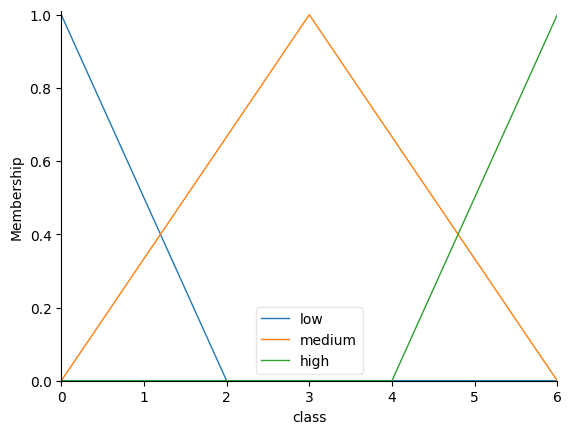

In [3]:
h_class.view()

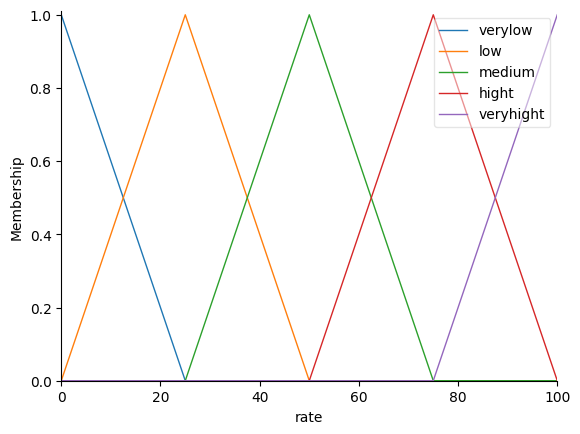

In [4]:
h_rate.view()

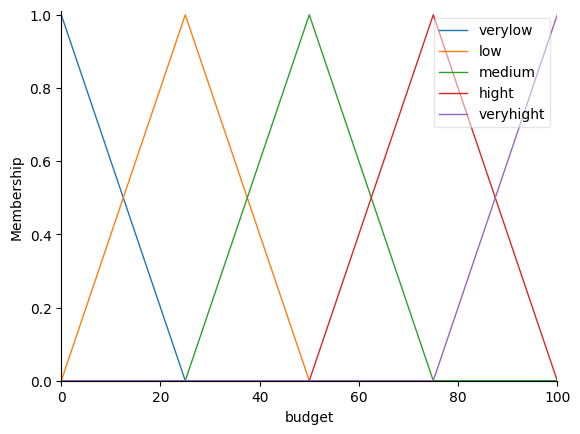

In [5]:
budget.view()

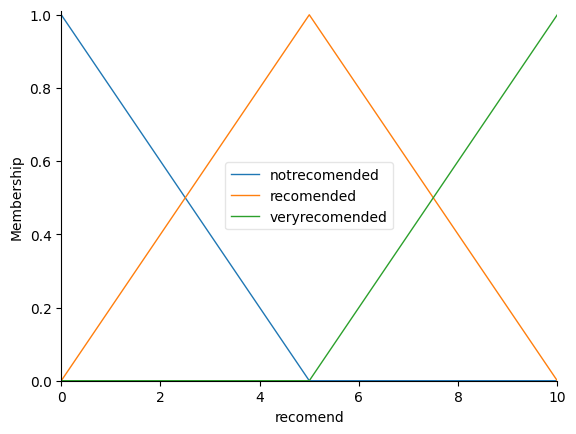

In [6]:
recomend.view()

In [7]:
# Define the fuzzy rules
# h-class hight, h-rate veryhight hight, budget ...
rule1 = ctrl.Rule((h_class['high'] & 
                   (h_rate['veryhight'] | h_rate['hight']) & 
                   (budget['low'] | budget['verylow'])), 
                   recomend['veryrecomended'])

rule2 = ctrl.Rule((h_class['high'] & 
                   (h_rate['veryhight'] | h_rate['hight']) & 
                   (budget['medium'])), 
                   recomend['recomended'])

rule3 = ctrl.Rule((h_class['high'] & 
                   (h_rate['veryhight'] | h_rate['hight']) & 
                   (budget['hight'] | budget['veryhight'])), 
                   recomend['notrecomended'])
# h-class medium, h-rate veryhight hight, budget ...
rule4 = ctrl.Rule((h_class['medium'] & 
                   (h_rate['veryhight'] | h_rate['hight']) & 
                   (budget['low'] | budget['verylow'])), 
                   recomend['veryrecomended'])

rule5 = ctrl.Rule((h_class['medium'] & 
                   (h_rate['veryhight'] | h_rate['hight']) & 
                   (budget['medium'])), 
                   recomend['recomended'])

rule6 = ctrl.Rule((h_class['medium'] & 
                   (h_rate['veryhight'] | h_rate['hight']) & 
                   (budget['hight'] | budget['veryhight'])), 
                   recomend['notrecomended'])
# h-class low, h-rate veryhight hight, budget ...
rule7 = ctrl.Rule((h_class['low'] & 
                   (h_rate['veryhight'] | h_rate['hight']) & 
                   (budget['low'] | budget['verylow'])), 
                   recomend['recomended'])

rule8 = ctrl.Rule((h_class['low'] & 
                   (h_rate['veryhight'] | h_rate['hight']) & 
                   (budget['medium'])), 
                   recomend['recomended'])

rule9 = ctrl.Rule((h_class['low'] & 
                   (h_rate['veryhight'] | h_rate['hight']) & 
                   (budget['hight'] | budget['veryhight'])), 
                   recomend['notrecomended'])




# h-class hight, h-rate medium, budget ...
rule10 = ctrl.Rule((h_class['high'] & 
                   (h_rate['medium']) & 
                   (budget['low'] | budget['verylow'])), 
                   recomend['veryrecomended'])

rule11 = ctrl.Rule((h_class['high'] & 
                   (h_rate['medium']) & 
                   (budget['medium'])), 
                   recomend['recomended'])

rule12 = ctrl.Rule((h_class['high'] & 
                   (h_rate['medium']) & 
                   (budget['hight'] | budget['veryhight'])), 
                   recomend['notrecomended'])
# h-class medium, h-rate medium, budget ...
rule13 = ctrl.Rule((h_class['medium'] & 
                   (h_rate['medium']) & 
                   (budget['low'] | budget['verylow'])), 
                   recomend['recomended'])

rule14 = ctrl.Rule((h_class['medium'] & 
                   (h_rate['medium']) & 
                   (budget['medium'])), 
                   recomend['recomended'])

rule15 = ctrl.Rule((h_class['medium'] & 
                   (h_rate['medium']) & 
                   (budget['hight'] | budget['veryhight'])), 
                   recomend['notrecomended'])
# h-class low, h-rate medium, budget ...
rule16 = ctrl.Rule((h_class['low'] & 
                   (h_rate['medium']) & 
                   (budget['low'] | budget['verylow'])), 
                   recomend['recomended'])

rule17 = ctrl.Rule((h_class['low'] & 
                   (h_rate['medium']) &  
                   (budget['medium'])), 
                   recomend['recomended'])

rule18 = ctrl.Rule((h_class['low'] & 
                   (h_rate['medium']) &  
                   (budget['hight'] | budget['veryhight'])), 
                   recomend['notrecomended'])





# h-class hight, h-rate verylow, low, budget ...
rule19 = ctrl.Rule((h_class['high'] & 
                   (h_rate['low'] | h_rate['verylow']) & 
                   (budget['low'] | budget['verylow'])), 
                   recomend['recomended'])

rule20 = ctrl.Rule((h_class['high'] & 
                   (h_rate['medium']) & 
                   (budget['medium'])), 
                   recomend['notrecomended'])

rule21 = ctrl.Rule((h_class['high'] & 
                   (h_rate['low'] | h_rate['verylow']) & 
                   (budget['hight'] | budget['veryhight'])), 
                   recomend['notrecomended'])
# h-class medium, h-rate verylow, low, budget ...
rule22 = ctrl.Rule((h_class['medium'] & 
                   (h_rate['low'] | h_rate['verylow']) & 
                   (budget['low'] | budget['verylow'])), 
                   recomend['notrecomended'])

rule23 = ctrl.Rule((h_class['medium'] & 
                   (h_rate['low'] | h_rate['verylow']) & 
                   (budget['medium'])), 
                   recomend['notrecomended'])

rule24 = ctrl.Rule((h_class['medium'] & 
                   (h_rate['low'] | h_rate['verylow']) & 
                   (budget['hight'] | budget['veryhight'])), 
                   recomend['notrecomended'])
# h-class low, h-rate verylow, low, budget ...
rule25 = ctrl.Rule((h_class['low'] & 
                   (h_rate['low'] | h_rate['verylow']) & 
                   (budget['low'] | budget['verylow'])), 
                   recomend['notrecomended'])

rule26 = ctrl.Rule((h_class['low'] & 
                   (h_rate['low'] | h_rate['verylow']) & 
                   (budget['medium'])), 
                   recomend['notrecomended'])

rule27 = ctrl.Rule((h_class['low'] & 
                   (h_rate['low'] | h_rate['verylow']) & 
                   (budget['hight'] | budget['veryhight'])), 
                   recomend['notrecomended'])



# Control System
recomend_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, 
                                    rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20,
                                    rule21, rule22, rule23, rule24, rule25, rule26, rule27])
recomend_simulation = ctrl.ControlSystemSimulation(recomend_ctrl)




class:  3.5  stars
rate:  4.5  visitor feadback
all period price:  450  CHF
all my trip budget:  3000  CHF
Recommendation: 8.142857142857142


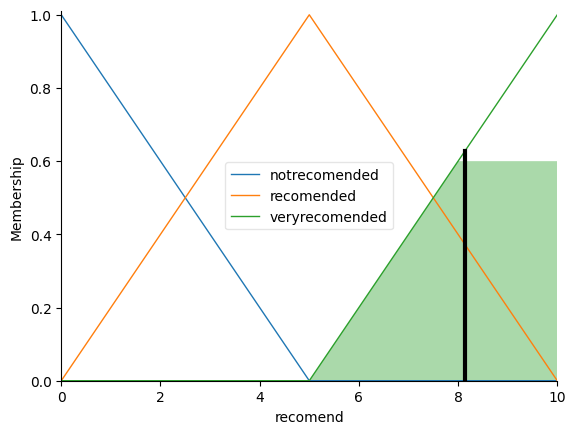

In [9]:
#  input change the value as you want in the specific range
Class = 3.5                       # 1 ---- 6
Rate = 4.5                        # 0 ---- 5
price = 450                    # free input
max_budget = 3000               # free input


print("class: ", Class, " stars")
print("rate: ", Rate, " visitor feadback")
print("all period price: ", price, " CHF")
print("all my trip budget: ", max_budget, " CHF")


Rate = Rate*20
budget = (price/max_budget) * 100  # 1 ---- 100



recomend_simulation.input['class'] = Class  
recomend_simulation.input['rate'] = Rate
recomend_simulation.input['budget'] = budget
recomend_simulation.compute()
print(f"Recommendation: {recomend_simulation.output['recomend']}")
recomend.view(sim=recomend_simulation)

In [ ]:
# old rules not in submition


# Very recommended (AND logic)
rule1 = ctrl.Rule((h_class['high'] & (h_rate['veryhight'] | h_rate['hight']) & 
                   (budget['medium'] | budget['hight'] | budget['veryhight'])), 
                   recomend['veryrecomended'])

rule6 = ctrl.Rule((h_class['high'] | h_rate['veryhight'] | budget['veryhight']), recomend['veryrecomended'])


# Recommended (AND logic)
rule2 = ctrl.Rule(((h_class['medium'] | h_class['high']) & 
                  (h_rate['medium'] | h_rate['hight'] | h_rate['veryhight']) & 
                  (budget['medium'] | budget['hight'])), recomend['recomended'])

rule7 = ctrl.Rule(((h_class['medium'] | h_class['high']) | 
                  (h_rate['medium'] | h_rate['hight']) | 
                  (budget['medium'] | budget['hight'])), recomend['recomended'])

rule3 = ctrl.Rule((h_class['high'] & (h_rate['low'] | h_rate['medium']) & 
                  (budget['medium'] | budget['low'])), recomend['recomended'])

# Not recommended (AND logic)
rule4 = ctrl.Rule(((h_class['low'] | h_class['medium']) & 
                  (h_rate['verylow'] | h_rate['low']) & 
                  (budget['low'] | budget['verylow'])), recomend['notrecomended'])

rule8 = ctrl.Rule((h_class['low'] | h_rate['verylow'] | budget['verylow']), recomend['notrecomended'])


rule5 = ctrl.Rule((h_class['low'] & (h_rate['verylow'] | h_rate['low']) & 
                  (budget['low'] | budget['verylow'])), recomend['notrecomended'])